In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data import

Import the data from the dataset and print out the name of each feature

In [2]:
PR_data = pd.read_csv('new_pullreq.csv')
pd.set_option('display.max_columns', None)
PR_data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,14668.0,15,0.089869,79,745.04600,0.00000,0.000000,2070,14,1.000000,118,0,0,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,0,4926,NaN,1.0,274.0,1.0,1.0,0.0,success,success,JavaScript,140,21,52,0.978469,25,237.0,196583.0,28,0,353,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,14,NaN,NaN,0.805841,0.629980,0.468658,0.658221,0.541352,0.0,0.0,1.0,neutral,0,28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,0,0,1,1,0,0,0,0,2,2,1,474.0,2,0.014019,38,147.48200,16.18700,21.582700,1,299,1.000000,38,0,0,0,2,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,1312,NaN,1.0,79.0,1.0,0.0,1.0,failure,failure,Python,1,6,1,1.000000,7,NaN,9.0,432,0,1092,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,300,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,34921.0,5,0.256849,175,4.64599,0.00000,0.114012,5,81,0.987654,33,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,4,NaN,1.0,88.0,1.0,1.0,0.0,success,success,JavaScript,11,6,0,0.996324,10,NaN,5743.0,652,0,1884,1,male,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.000000,0.000000,NaN,94,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.0,0.0,NaN,0,505,0.428571,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,0,0,2,2,2,0,0,0,0,0,0,143159.0,5,0.014706,24,120.71000,0.00000,10.109800,2194,293,0.989761,222,110,3,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,1,94,NaN,1.0,489.0,1.0,1.0,0.0,success,success,Go,269,37,212,0.986523,29,NaN,978.0,1050,0,3489,1,male,canada,NaN,0.814346,0.633765,0.471257,0.666831,0.485847,0.0,0.000000,0.000000,NaN,679,NaN,NaN,0.818143,0.630804,0.466899,0.650931,0.496465,0.0,0.0,0.0,NaN,1,460,0.138889,NaN,NaN,0.003796,0.002961,0.004358,0.015900,0.010618,0,0,0,0,0,0,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,0,0,2,2,2,0,0,0,1,1,1,6247.0,2,0.173077,7,554.16800,28.61830,84.142200,131,3,1.000000,1,60,0,0,

In [3]:
PR_data[PR_data['project_id'] == 13708387]

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,14668.0,15,0.089869,79,745.046,0.00000,0.0000,2070,14,1.000000,118,0,0,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,0,4926,NaN,1.0,274.0,1.0,1.0,0.000000,success,success,JavaScript,140,21,52,0.978469,25,237.0,196583.0,28,0,353,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,14,NaN,NaN,0.805841,0.629980,0.468658,0.658221,0.541352,0.0,0.000000,1.000000,neutral,0,28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1,0,0,0,0,30.0,1,0.007948,0,237,0
4488,4489,13708387,stylelint,stylelint,1,7769,7769.0,7,218,103,3,0,4,7,3,0,1,3,22,39,3,6477.0,5,0.116910,69,681.062,0.00000,0.0000,673,1,1.000000,345,263,58,14,39,0.102564,0.230769,0.666667,3,1,2,2,0,0,1,0,71,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,30,14,42,0.979351,5,12.0,14714.0,2,0,1497,0,male,united kingdom,NaN,0.813158,0.593229,0.444595,0.701420,0.529748,0.272727,0.272727,0.454545,neutral,142,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.0,0.285714,0.714286,neutral,0,13,0.428571,NaN,NaN,0.003895,0.061230,0.047270,0.036098,0.006232,1,1,1,1,1,1,0,11,17,0,3.0,0,0.001325,0,7769,0
5279,5280,13708387,stylelint,stylelint,1,589,589.0,2,212,244,4,0,22,26,21,1,4,0,1,1,1,19323.0,11,0.094156,20,713.504,9.59286,18.1182,3474,298,0.983221,64,398,58,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,1,24,NaN,1.0,29885.0,1.0,1.0,0.000000,success,success,JavaScript,316,30,80,0.979310,37,NaN,261.0,1375,0,2224,1,NaN,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.000000,0.000000,1.000000,neutral,428,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.0,0.000000,0.000000,NaN,0,449,0.186047,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,0,1,0,0,0.0,0,0.286101,0,589,0
6798,6799,13708387,stylelint,stylelint,1,14642,14642.0,3,8,0,0,0,1,1,1,0,0,0,7,7,4,18893.0,11,0.151420,2,711.504,9.60481,18.2629,3321,0,0.000000,6,6,2,0,7,0.000000,0.000000,1.000000,4,0,0,0,0,0,1,0,19,NaN,1.0,403.0,2.0,0.0,0.500000,failure,success,JavaScript,300,29,69,0.978817,37,7.0,284613.0,1,1,1879,0,NaN,NaN,NaN,0.804032,0.659139,0.463307,0.655809,0.469856,0.000000,0.000000,1.000000,neutral,403,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.0,0.000000,0.000000,NaN,0,4,0.069767,NaN,NaN,0.013020,0.004680,0.028558,0.00951

In [4]:
for column in PR_data.columns:
    print(column)

id
project_id
ownername
reponame
merged_or_not
lifetime_minutes
mergetime_minutes
num_commits
src_churn
test_churn
files_added
files_deleted
files_modified
files_changed
src_files
doc_files
other_files
num_commit_comments
num_issue_comments
num_comments
num_participants
sloc
team_size
perc_external_contribs
commits_on_files_touched
test_lines_per_kloc
test_cases_per_kloc
asserts_per_kloc
watchers
prev_pullreqs
requester_succ_rate
followers
churn_addition
churn_deletion
pr_comment_num
comment_num
perc_neg_emotion
perc_pos_emotion
perc_neu_emotion
part_num_issue
part_num_commit
part_num_pr
part_num_code
comment_conflict
hash_tag
at_tag
test_inclusion
description_length
bug_fix
ci_exists
ci_latency
ci_build_num
ci_test_passed
ci_failed_perc
ci_first_build_status
ci_last_build_status
language
fork_num
project_age
open_issue_num
pr_succ_rate
open_pr_num
first_response_time
pushed_delta
acc_commit_num
first_pr
account_creation_days
core_member
contrib_gender
contrib_country
contrib_affiliati

# Function use to draw picture

In [5]:
def picturehist(x,
                minvalue,
                maxvalue,
                distance,
                binvalue=10,
                rwidth=0.8,
                xlabel=None,
                ylabel=None,
                figname=None):
    plt.figure(figsize=(20, 10))
    plt.hist(x, bins=binvalue, histtype='bar', rwidth=0.4)
    plt.xticks(range(minvalue, maxvalue)[::distance])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(figname)
    plt.show()


def count(x):
    M = 0
    MF = 0
    counts = list()
    for i in x:
        if i[1] == 1:
            M += 1
        else:
            MF += 1
    counts.append(M)
    counts.append(MF)
    return counts

In [6]:
def picture_sameX_plot(list1, list2, xlabel=None):
    fig, ax1 = plt.subplots(figsize=(12, 4))
    x = list(range(len(list1)))
    ax1.plot(x, list1, c='r')
    ax1.set_ylabel('Merged')
    ax2 = ax1.twinx()
    ax2.plot(x, list2, c='g')
    ax2.set_ylabel('Merge Failed')
    plt.xticks(x, xlabel)
    plt.show()

In [7]:
def picture_double_plot(list1, list2, xlabel=None):
    plt.figure(figsize=(12, 4))
    x = list(range(len(list1)))
    plt.plot(x, list1, c='r', label='Merge')
    plt.plot(x, list2, c='g', label='Merge Failed')
    plt.legend()
    plt.xticks(x, xlabel)
    plt.show()

In [8]:
def picture_double_bar(list1, list2, tick_label, width=0.4,xlabel=None,ylabel=None):
    plt.figure(figsize=(20, 10))
    x = list(range(len(list1)))
    plt.bar(x, list1, width=width, label='Merged', fc='b')
    for i in range(len(x)):
        x[i] = x[i] + width
    plt.bar(x,
            list2,
            width=width,
            label='Merge Failed',
            tick_label=tick_label,
            fc='orange')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Data Statistics

To select the features we want from 118 Numbers,and get a new dataframe named **Project_feature_data**.

In [9]:
Project_feature_data = PR_data[[
    'project_id', 'language', 'project_age', 'pushed_delta', 'pr_succ_rate',
    'open_issue_num', 'open_pr_num', 'fork_num', 'merged_or_not', 'core_member'
]]
Project_feature_data

,project_id,language,project_age,pushed_delta,pr_succ_rate,open_issue_num,open_pr_num,fork_num,merged_or_not,core_member
0,13708387,JavaScript,21,196583.0,0.978469,52,25,140,1,0
1,100297899,Python,6,9.0,1.000000,1,7,1,0,1
2,93139005,JavaScript,6,5743.0,0.996324,0,10,11,1,1
3,15059440,Go,37,978.0,0.986523,212,29,269,1,1
4,29684214,Python,25,517153.0,0.978495,93,9,64,1,0
...,...,...,...,...,...,...,...,...,...,...
3347932,30544060,JavaScript,20,18087.0,1.000000,2,0,0,1,1
3347933,1142,Python,55,431.0,0.965155,3359,372,2454,0,1
3347934,31499094,JavaScript,9,78766.0,0.992126,62,8,125,1,0
3347935,55317,JavaScript,27,995650.0,0.991597,174,0,84,0,0


In [10]:
Project_feature_data.isna().sum() 

project_id            0
language              0
project_age           0
pushed_delta      20542
pr_succ_rate      10203
open_issue_num        0
open_pr_num           0
fork_num              0
merged_or_not         0
core_member           0
dtype: int64

In [11]:
dataset_statistics=PR_data[[
    'project_age', 'pushed_delta', 'pr_succ_rate',
    'open_issue_num', 'open_pr_num', 'fork_num', 'merged_or_not'
]]
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [12]:
dataset_statistics.describe()

,project_age,pushed_delta,pr_succ_rate,open_issue_num,open_pr_num,fork_num,merged_or_not
count,3347937.000,3327395.000,3337734.000,3347937.000,3347937.000,3347937.000,3347937.000
mean,33.876,295904.320,0.969,251.132,86.492,768.346,0.809
std,24.401,1339992.532,0.049,754.886,314.884,2231.842,0.393
min,-22.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,14.000,3865.000,0.963,2.000,4.000,13.000,1.000
50%,30.000,27414.000,0.979,32.000,13.000,78.000,1.000
75%,49.000,154505.000,0.991,161.000,48.000,402.000,1.000
max,135.000,157351000.000,1.000,7263.000,10936.000,34664.000,1.000


The statistics are centralized with how many projects, and there are 112,30 projects.

In [13]:
Project_data = Project_feature_data[['project_id']].drop_duplicates(subset=['project_id'])
Project_data

,project_id
0,13708387
1,100297899
2,93139005
3,15059440
4,29684214
...,...
632247,41631382
661336,81645409
691799,5621076
765017,109398748


# Data processing

Start by taking out the features required for each project feature individually to create a new Dataframe so that they can be processed separately.

In [14]:
#Program language
program_language = Project_feature_data[['project_id','language']].drop_duplicates(subset=['project_id'])
#Popularity of project
popu_of_pro = Project_feature_data[['fork_num', 'merged_or_not']]
#Age of project
age_of_pro = Project_feature_data[['project_age','merged_or_not']]
#workload of project
workload_of_project = Project_feature_data[['open_pr_num','merged_or_not']]
#Activeness of project and Openness of a project
feature = Project_feature_data[['pushed_delta','pr_succ_rate','open_issue_num','fork_num','merged_or_not']]

The Age of project is processed first, and pull requests with values less than 0 are deleted.

In [15]:
#Age of project dataset after process
age= age_of_pro[age_of_pro['project_age']>=0]

Next the missing values are dealt with, here we have chosen to use mean padding.

In [16]:
feature.fillna(feature.mean(),inplace=True)

E:\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# Data analysis

In this section, we will first test the data distribution using the KS test, then test the correlation between each feature and the combined results using the chi-square test, and finally analyse the data for each item feature individually.

##  Kolmogorov‑Smirnov test

The ks test is first used to test the distribution of each eigenvalue to see if it is normally distributed.

As the programming language is not a continuous value, we start with the project popularity, i.e. fork_num, to see the distribution.

In [17]:
u=popu_of_pro['fork_num'].mean()
std = popu_of_pro['fork_num'].std()
stats.kstest(popu_of_pro['fork_num'],'norm',(u,std))

KstestResult(statistic=0.36532336081696126, pvalue=0.0)

The next step is to see the distribution of project ages, i.e. project_num

In [18]:
u=age['project_age'].mean()
std = age['project_age'].std()
stats.kstest(age['project_age'],'norm',(u,std))

KstestResult(statistic=0.08248324747591379, pvalue=0.0)

Then to the project workload, i.e. open_pr_num

In [19]:
u=workload_of_project['open_pr_num'].mean()
std = workload_of_project['open_pr_num'].std()
stats.kstest(workload_of_project['open_pr_num'],'norm',(u,std))

KstestResult(statistic=0.39178113595701985, pvalue=0.0)

Then to the Activeness of project, i.e. pushed_delta

In [20]:
u=feature['pushed_delta'].mean()
std = feature['pushed_delta'].std()
stats.kstest(feature['pushed_delta'],'norm',(u,std))

KstestResult(statistic=0.4123492539811553, pvalue=0.0)

Then to the Openness of a project, i.e. open_issue_num

In [21]:
u=feature['open_issue_num'].mean()
std = feature['open_issue_num'].std()
stats.kstest(feature['open_issue_num'],'norm',(u,std))

KstestResult(statistic=0.3696894732074344, pvalue=0.0)

## Chi-Square Test

A chi-square test for programming languages

In [22]:
program_language_merge=Project_feature_data[['language','merged_or_not','core_member']]
program_language_merge

,language,merged_or_not,core_member
0,JavaScript,1,0
1,Python,0,1
2,JavaScript,1,1
3,Go,1,1
4,Python,1,0
...,...,...,...
3347932,JavaScript,1,1
3347933,Python,0,1
3347934,JavaScript,1,0
3347935,JavaScript,0,0


In [23]:
crosstab = pd.crosstab(index=program_language_merge['merged_or_not'],
                       columns=program_language_merge['language'],
                       margins=True)
obs = np.array([crosstab.iloc[0][0:6].values, crosstab.iloc[1][0:6].values])
Chi_Square = stats.chi2_contingency(obs)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s' %
      Chi_Square)

chisq-statistic=11019.3512, p-value=0.0000, df=5 expected_frep=[[ 53570.31685572 124541.37031252 189244.20344708 176129.35129843
   70689.8494449   23665.90864135]
 [227612.68314428 529158.62968748 804071.79655292 748348.64870157
  300351.1505551  100553.09135865]]


In [24]:
crosstab

language,Go,Java,JavaScript,Python,Ruby,Scala,All
merged_or_not,,,,,,,
0,41706,139836,178134,172645,72569,32951,637841
1,239477,513864,815182,751833,298472,91268,2710096
All,281183,653700,993316,924478,371041,124219,3347937


A chi-square test for Popularity of project 

In [25]:
fork_num_50=popu_of_pro[popu_of_pro['fork_num']<=50].values.tolist()
fork_num_100=popu_of_pro[(popu_of_pro['fork_num']>50)&(popu_of_pro['fork_num']<=100)].values.tolist()
fork_num_200=popu_of_pro[(popu_of_pro['fork_num']>100)&(popu_of_pro['fork_num']<=200)].values.tolist()
fork_num_300=popu_of_pro[(popu_of_pro['fork_num']>200)&(popu_of_pro['fork_num']<=300)].values.tolist()
fork_num_500=popu_of_pro[(popu_of_pro['fork_num']>300)&(popu_of_pro['fork_num']<=500)].values.tolist()
fork_num_1000=popu_of_pro[(popu_of_pro['fork_num']>500)&(popu_of_pro['fork_num']<=1000)].values.tolist()
fork_num_2000=popu_of_pro[(popu_of_pro['fork_num']>1000)&(popu_of_pro['fork_num']<=2000)].values.tolist()
fork_num_3000=popu_of_pro[(popu_of_pro['fork_num']>2000)&(popu_of_pro['fork_num']<=3000)].values.tolist()
fork_num_more_3000=popu_of_pro[popu_of_pro['fork_num']>3000].values.tolist()

In [26]:
list_50=count(fork_num_50)
list_100=count(fork_num_100)
list_200=count(fork_num_200)
list_300=count(fork_num_300)
list_500=count(fork_num_500)
list_1000=count(fork_num_1000)
list_2000=count(fork_num_2000)
list_3000=count(fork_num_3000)
list_more_3000=count(fork_num_more_3000)
fork_num_merge_or_not = pd.DataFrame({
                        '0-50': list_50,
                        '50-100': list_100,
                        '100-200': list_200,
                        '200-300': list_300,
                        '300-500': list_500,
                        '500-1000': list_1000,
                        '1000-2000':list_2000,
                        '2000-3000':list_3000,
                        '>3000':list_more_3000
                         })
fork_num_merge_or_not['ALL'] = fork_num_merge_or_not.apply(lambda x: x.sum(), axis=1)
fork_num_merge_or_not.loc['ALL'] = fork_num_merge_or_not.apply(lambda x: x.sum())

fork_num_merge_or_not.index = ['1', '0', 'ALL']
fork_num_merge_or_not

,0-50,50-100,100-200,200-300,300-500,500-1000,1000-2000,2000-3000,>3000,ALL
1,1242840,300934,295282,168010,174454,187417,135678,63529,141952,2710096
0,199689,63250,68325,41670,49796,61055,56344,26344,71368,637841
ALL,1442529,364184,363607,209680,224250,248472,192022,89873,213320,3347937


In [27]:
fork_num_merge_or_not.loc['merge failed percent'] = fork_num_merge_or_not.loc['0'].values/fork_num_merge_or_not.loc['ALL'].values
fork_num_merge_or_not.loc['merged percent'] = fork_num_merge_or_not.loc['1'].values/fork_num_merge_or_not.loc['ALL'].values

In [28]:
fork_num_merge_or_not

,0-50,50-100,100-200,200-300,300-500,500-1000,1000-2000,2000-3000,>3000,ALL
1,1242840.000,300934.000,295282.000,168010.000,174454.000,187417.000,135678.000,63529.000,141952.000,2710096.000
0,199689.000,63250.000,68325.000,41670.000,49796.000,61055.000,56344.000,26344.000,71368.000,637841.000
ALL,1442529.000,364184.000,363607.000,209680.000,224250.000,248472.000,192022.000,89873.000,213320.000,3347937.000
merge failed percent,0.138,0.174,0.188,0.199,0.222,0.246,0.293,0.293,0.335,0.191
merged percent,0.862,0.826,0.812,0.801,0.778,0.754,0.707,0.707,0.665,0.809


In [29]:
obs_fork = np.array([fork_num_merge_or_not.iloc[0][0:9].values,fork_num_merge_or_not.iloc[1][0:9].values])
Chi_Square_fork = stats.chi2_contingency(obs_fork)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s' %
      Chi_Square_fork)

chisq-statistic=80531.2029, p-value=0.0000, df=8 expected_frep=[[1167701.80346404  294800.52989767  294333.45856628  169732.26475886
   181526.42298825  201133.70511811  155438.42495005   72750.60964648
   172678.78061027]
 [ 274827.19653596   69383.47010233   69273.54143372   39947.73524114
    42723.57701175   47338.29488189   36583.57504995   17122.39035352
    40641.21938973]]


A chi-square test for Age of project

In [30]:
age_num_10=age[age['project_age']<=10].values.tolist()
age_num_20=age[(age['project_age']>10)&(age['project_age']<=20)].values.tolist()
age_num_30=age[(age['project_age']>20)&(age['project_age']<=30)].values.tolist()
age_num_40=age[(age['project_age']>30)&(age['project_age']<=40)].values.tolist()
age_num_50=age[(age['project_age']>40)&(age['project_age']<=50)].values.tolist()
age_num_60=age[(age['project_age']>50)&(age['project_age']<=60)].values.tolist()
age_num_70=age[(age['project_age']>60)&(age['project_age']<=70)].values.tolist()
age_num_80=age[(age['project_age']>70)&(age['project_age']<=80)].values.tolist()
age_num_90=age[(age['project_age']>80)&(age['project_age']<=90)].values.tolist()
age_num_100=age[(age['project_age']>90)&(age['project_age']<=100)].values.tolist()
age_num_110=age[(age['project_age']>100)&(age['project_age']<=110)].values.tolist()
age_num_120=age[(age['project_age']>110)&(age['project_age']<=120)].values.tolist()
age_num_130=age[(age['project_age']>120)&(age['project_age']<=130)].values.tolist()
age_num_more_130=age[age['project_age']>130].values.tolist()
age_list_10=count(age_num_10)
age_list_20=count(age_num_20)
age_list_30=count(age_num_30)
age_list_40=count(age_num_40)
age_list_50=count(age_num_50)
age_list_60=count(age_num_60)
age_list_70=count(age_num_70)
age_list_80=count(age_num_80)
age_list_90=count(age_num_90)
age_list_100=count(age_num_100)
age_list_110=count(age_num_110)
age_list_120=count(age_num_120)
age_list_130=count(age_num_130)
age_list_more_130=count(age_num_more_130)
age_num_merge_or_not = pd.DataFrame({
                        '0-10': age_list_10,
                        '10-20': age_list_20,
                        '20-30': age_list_30,
                        '30-40': age_list_40,
                        '40-50': age_list_50,
                        '50-60': age_list_60,
                        '60-70':age_list_70,
                        '70-80':age_list_80,
                        '80-90':age_list_90,
                        '90-100':age_list_100,
                        '100-110':age_list_110,
                        '110-120':age_list_120,
                        '120-130':age_list_130,
                        '>130':age_list_more_130
                         })

age_num_merge_or_not['ALL'] = age_num_merge_or_not.apply(lambda x: x.sum(), axis=1)
age_num_merge_or_not.loc['ALL'] = age_num_merge_or_not.apply(lambda x: x.sum())

In [31]:
age_num_merge_or_not.index = ['1', '0', 'ALL']
age_num_merge_or_not.loc['merge failed percent'] = age_num_merge_or_not.loc['0'].values/age_num_merge_or_not.loc['ALL'].values
age_num_merge_or_not.loc['merged percent'] = age_num_merge_or_not.loc['1'].values/age_num_merge_or_not.loc['ALL'].values

In [32]:
age_num_merge_or_not

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,100-110,110-120,120-130,>130,ALL
1,518466.000,460875.000,421064.000,374748.000,308645.000,231256.000,151072.000,106213.000,70840.000,37789.000,17432.000,7786.000,3132.000,478.000,2709796.000
0,100724.000,110471.000,102008.000,90140.000,75826.000,59948.000,37545.000,26890.000,17281.000,9407.000,4438.000,2366.000,658.000,98.000,637800.000
ALL,619190.000,571346.000,523072.000,464888.000,384471.000,291204.000,188617.000,133103.000,88121.000,47196.000,21870.000,10152.000,3790.000,576.000,3347596.000
merge failed percent,0.163,0.193,0.195,0.194,0.197,0.206,0.199,0.202,0.196,0.199,0.203,0.233,0.174,0.170,0.191
merged percent,0.837,0.807,0.805,0.806,0.803,0.794,0.801,0.798,0.804,0.801,0.797,0.767,0.826,0.830,0.809


In [33]:
obs_age = np.array([age_num_merge_or_not.iloc[0][0:14].values,age_num_merge_or_not.iloc[1][0:14].values])
Chi_Square_age = stats.chi2_contingency(obs_age)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s' %
      Chi_Square_age)

chisq-statistic=4197.2783, p-value=0.0000, df=13 expected_frep=[[5.01218960e+05 4.62490428e+05 4.23413821e+05 3.76315315e+05
  3.11219746e+05 2.35722421e+05 1.52680787e+05 1.07743580e+05
  7.13317656e+04 3.82039924e+04 1.77032230e+04 8.21779241e+03
  3.06791107e+03 4.66257725e+02]
 [1.17971040e+05 1.08855572e+05 9.96581791e+04 8.85726851e+04
  7.32512537e+04 5.54815788e+04 3.59362129e+04 2.53594201e+04
  1.67892344e+04 8.99200764e+03 4.16677699e+03 1.93420759e+03
  7.22088926e+02 1.09742275e+02]]


# Characteristics1:Program language

First of all, the data set will be processed, and the program language of each project will be counted.

In [34]:
language_num=program_language['language'].value_counts().tolist()
language = ['JavaScript','Python','Java','Ruby ','Go','Scala']

## Bar：

<ipython-input-35-1e0ec28d3d7c>:15: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=s,


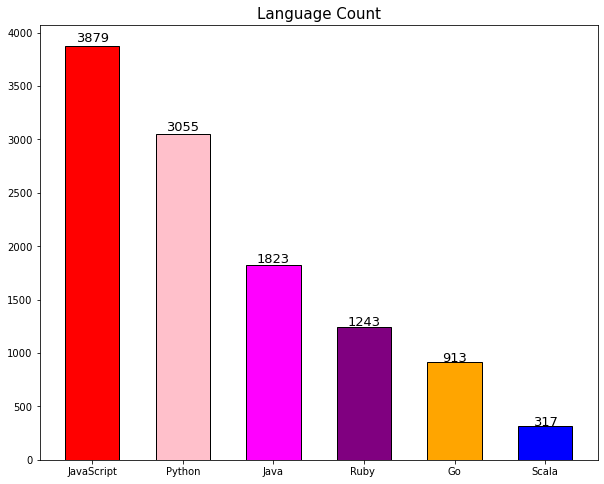

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['red', 'pink', 'magenta', 'purple', 'orange', 'blue']
ax.bar(x=language,
       height=language_num,
       width=0.6,
       align="center",
       color=colors,
       edgecolor="black",
       linewidth=1.0)
ax.set_title("Language Count", fontsize=15)
xticks = ax.get_xticks()
for i in range(len(language_num)):
    xy = (xticks[i], language_num[i] * 1.01)
    s = str(language_num[i])
    ax.annotate(s=s,
                xy=xy,
                fontsize=13,
                color="black",
                ha="center",
                va="baseline")

## Pie：

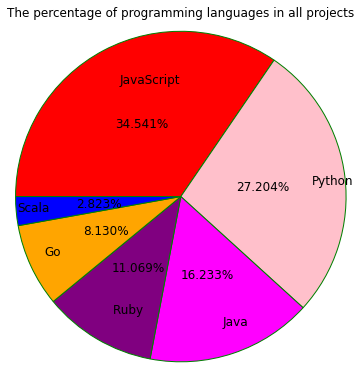

In [36]:
plt.axes(aspect='equal')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.pie(x=language_num,
        labels=language,
        colors=colors,
        autopct='%.3f%%',
        pctdistance=0.5,
        labeldistance=0.8,
        startangle=180,
        center=(2.5, 1),
        radius=3.8,
        counterclock=False,
        wedgeprops={
            'linewidth': 1,
            'edgecolor': 'green'
        },
        textprops={
            'fontsize': 12,
            'color': 'black'
        },
        frame=1)
plt.xticks(())
plt.yticks(())
plt.title('The percentage of programming languages in all projects')

plt.show()

It can be seen that in all 11230 items, javaScript and Python accounted for the majority of the items, while other languages accounted for a relatively small proportion, indicating that the language distribution of items in the data set is very uneven, which may be because javaScript and Python are the main popular languages at present.

In [37]:
crosstab.loc['merge failed percent'] = crosstab.loc[0].values/crosstab.loc['All'].values
crosstab.loc['merged percent'] = crosstab.loc[1].values/crosstab.loc['All'].values

In [38]:
crosstab

language,Go,Java,JavaScript,Python,Ruby,Scala,All
merged_or_not,,,,,,,
0,41706.000,139836.000,178134.000,172645.000,72569.000,32951.000,637841.000
1,239477.000,513864.000,815182.000,751833.000,298472.000,91268.000,2710096.000
All,281183.000,653700.000,993316.000,924478.000,371041.000,124219.000,3347937.000
merge failed percent,0.148,0.214,0.179,0.187,0.196,0.265,0.191
merged percent,0.852,0.786,0.821,0.813,0.804,0.735,0.809


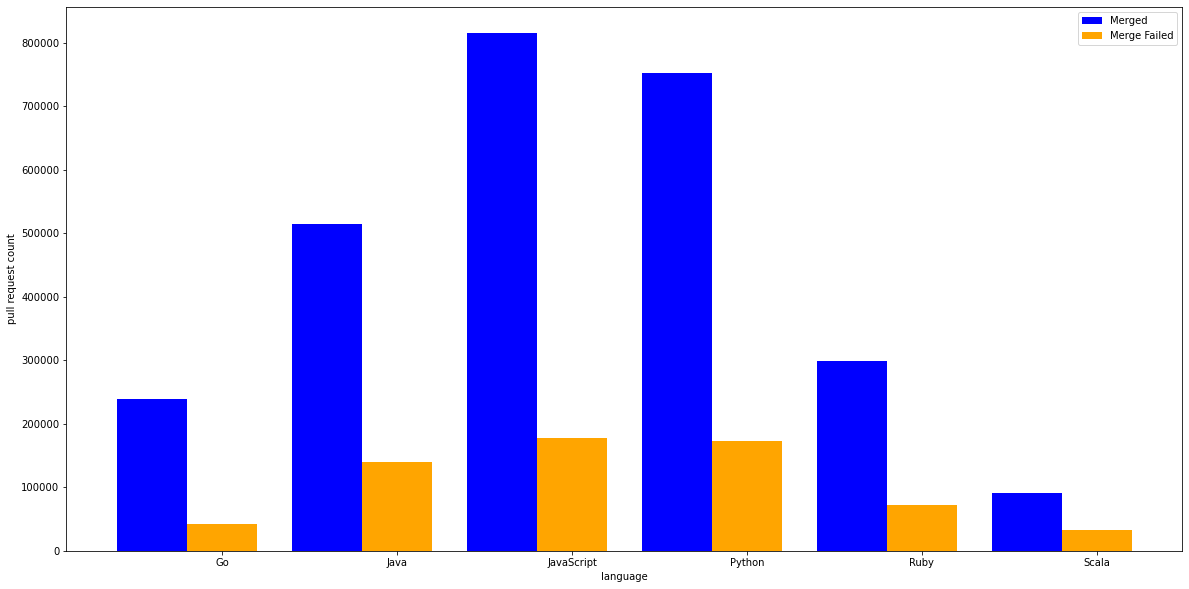

In [39]:
not_merge = crosstab.iloc[0][0:6].values.tolist()
merge = crosstab.iloc[1][0:6].values.tolist()
language_name = ['Go', 'Java', 'JavaScript', 'Python', 'Ruby', 'Scala']
picture_double_bar(merge, not_merge, language_name,xlabel='language',ylabel='pull request count')

## Association Rules

In [40]:
language_merge = program_language_merge=Project_feature_data[['language','merged_or_not']]
language_merge_list=language_merge.values.tolist()
for i in range(len(language_merge_list)):
    if language_merge_list[i][1]==1:
        language_merge_list[i][1] = 'Merged'
    else:
        language_merge_list[i][1] = 'Merge Failed'

In [41]:
language_merge

,language,merged_or_not
0,JavaScript,1
1,Python,0
2,JavaScript,1
3,Go,1
4,Python,1
...,...,...
3347932,JavaScript,1
3347933,Python,0
3347934,JavaScript,1
3347935,JavaScript,0


In [42]:
language_merge_list

[['JavaScript', 'Merged'],
 ['Python', 'Merge Failed'],
 ['JavaScript', 'Merged'],
 ['Go', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Python', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['JavaScript', 'Merged'],
 ['JavaScript', 'Merge Failed'],
 ['Scala', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Java', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Go', 'Merged'],
 ['Java', 'Merged'],
 ['Java', 'Merge Failed'],
 ['Scala', 'Merge Failed'],
 ['JavaScript', 'Merged'],
 ['Java', 'Merged'],
 ['Python', 'Merged'],
 ['Go', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Java', 'Merged'],
 ['JavaScript', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Python', 'Merge Failed'],
 ['Go', 'Merged'],
 ['Java', 'Merged'],
 ['JavaScript', 'Merge Failed'],
 ['Python', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Ruby', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Ruby', 'Merge Failed'],
 ['Pytho

In [43]:
te = TransactionEncoder()
df_tf = te.fit_transform(language_merge_list)
df = pd.DataFrame(df_tf,columns=te.columns_)
df.drop('Merge Failed',axis=1,inplace=True)
frequent_itemsets = apriori(df,min_support=0.001,use_colnames= True)
rules = association_rules(frequent_itemsets,metric = 'confidence',min_threshold = 0.15)
rules.drop(index=[2,3,5],inplace=True)

In [44]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Go),(Merged),0.084,0.809,0.072,0.852,1.052,0.004,1.284
1,(Merged),(Java),0.809,0.195,0.153,0.190,0.971,-0.005,0.993
4,(JavaScript),(Merged),0.297,0.809,0.243,0.821,1.014,0.003,1.062
6,(Python),(Merged),0.276,0.809,0.225,0.813,1.005,0.001,1.020
7,(Ruby),(Merged),0.111,0.809,0.089,0.804,0.994,-0.001,0.974
8,(Scala),(Merged),0.037,0.809,0.027,0.735,0.908,-0.003,0.718


In [45]:
lift = rules['lift'].values.tolist()
lift_list=sorted(lift)
lift_name = ['Scala','Java','Ruby','Python','JavaScript','Go']

Text(0, 0.5, 'Lift')

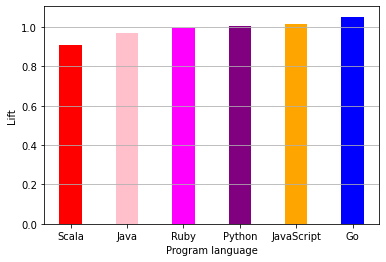

In [46]:
fig1 = plt.figure()
plt.grid(axis='y')
plt.bar(lift_name,lift_list,0.4,color=colors)

plt.xlabel('Program language')
plt.ylabel('Lift')

## Extracting pull request requests from JavaScript, Python and Java

In [47]:
more_language = program_language_merge[
    (program_language_merge['language'] == 'JavaScript') |
    (program_language_merge['language'] == 'Java') |
    (program_language_merge['language'] == 'Python')]

In [48]:
crosstab_more_language = pd.crosstab(index=more_language['merged_or_not'],
                       columns=more_language['language'],
                       margins=True)

In [49]:
crosstab_more_language

language,Java,JavaScript,Python,All
merged_or_not,,,,
0,139836,178134,172645,490615
1,513864,815182,751833,2080879
All,653700,993316,924478,2571494


In [50]:
obs_more_language = np.array([
    crosstab_more_language.iloc[0][0:3].values,
    crosstab_more_language.iloc[1][0:3].values
])

Chi_Square__more_language = stats.chi2_contingency(obs_more_language)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s' %
      Chi_Square__more_language)

chisq-statistic=3206.5596, p-value=0.0000, df=2 expected_frep=[[124719.33650244 189514.62820446 176381.0352931 ]
 [528980.66349756 803801.37179554 748096.9647069 ]]


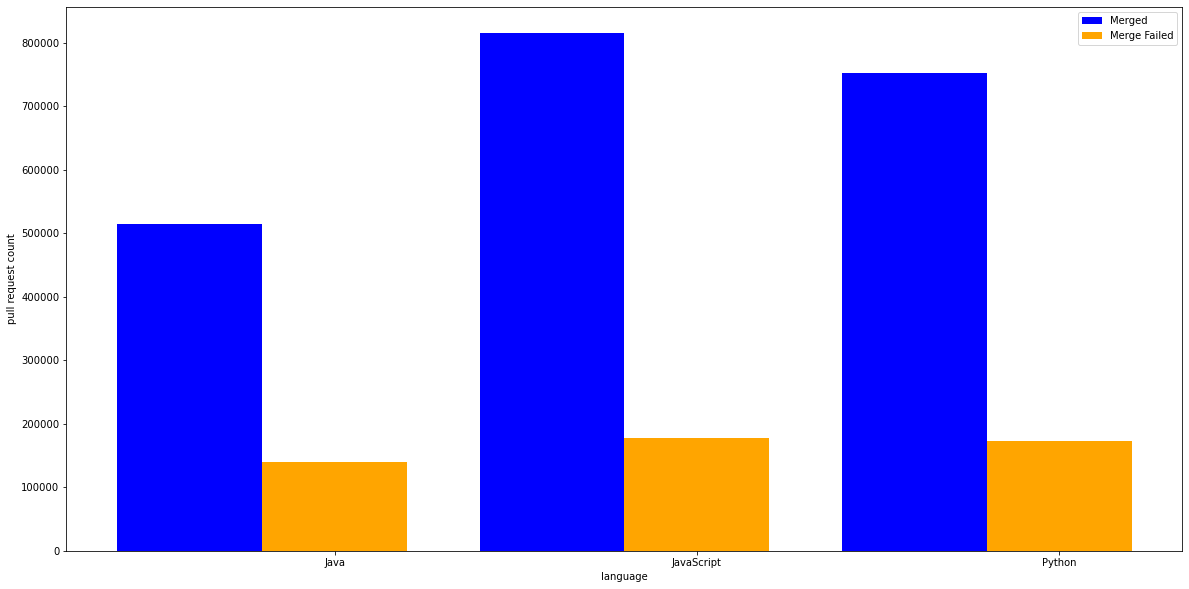

In [51]:
not_merge_more_language = crosstab_more_language.iloc[0][0:3].values.tolist()
merge_more_language = crosstab_more_language.iloc[1][0:3].values.tolist()
language_name_more_language = ['Java', 'JavaScript', 'Python']
picture_double_bar(merge_more_language, not_merge_more_language,
                   language_name_more_language,xlabel='language',ylabel='pull request count')

## Association Rules for JavaScript Java and Python

In [52]:
more_language_merge_list = more_language.values.tolist()
for i in range(len(more_language_merge_list)):
    if more_language_merge_list[i][1] == 1:
        more_language_merge_list[i][1] = 'Merged'
    else:
        more_language_merge_list[i][1] = 'Merge Failed'

In [53]:
df_tf_more_language = te.fit_transform(more_language_merge_list)
df_more_language = pd.DataFrame(df_tf_more_language, columns=te.columns_)
df_more_language.drop('Merge Failed', axis=1, inplace=True)
frequent_itemsets_more_language = apriori(df_more_language,
                                          min_support=0.05,
                                          use_colnames=True)
rules_more_language = association_rules(frequent_itemsets_more_language,
                                        metric='confidence',
                                        min_threshold=0.15)
rules_more_language.drop(index=[0, 3, 4], inplace=True)

In [54]:
frequent_itemsets_more_language

,support,itemsets
0,0.254,(Java)
1,0.386,(JavaScript)
2,0.809,(Merged)
3,0.360,(Python)
4,0.200,"(Merged, Java)"
5,0.317,"(Merged, JavaScript)"
6,0.292,"(Merged, Python)"


In [55]:
rules_more_language

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Java),(Merged),0.254,0.809,0.200,0.786,0.971,-0.006,0.892
2,(Merged),(JavaScript),0.809,0.386,0.317,0.392,1.014,0.004,1.009
5,(Python),(Merged),0.360,0.809,0.292,0.813,1.005,0.001,1.022


# Characteristics2:Popularity of project

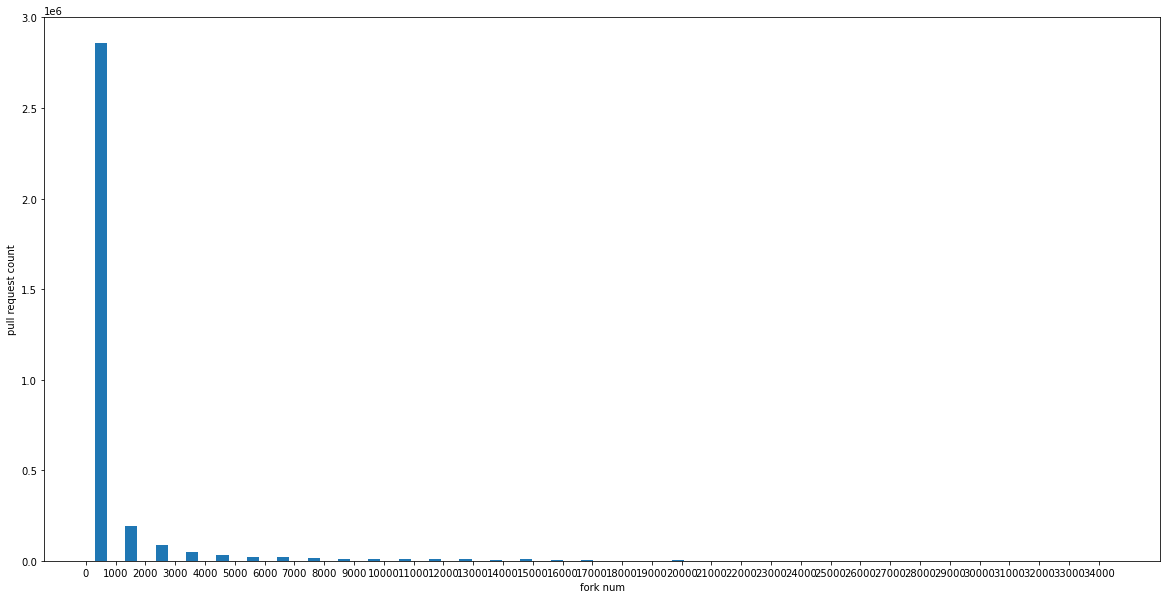

In [56]:
fork_num = popu_of_pro['fork_num'].values.tolist()
bin = int((max(fork_num) - min(fork_num)) / 1000)
picturehist(fork_num, min(fork_num), max(fork_num), 1000, bin, 0.4, 'fork num','pull request count','fork count')

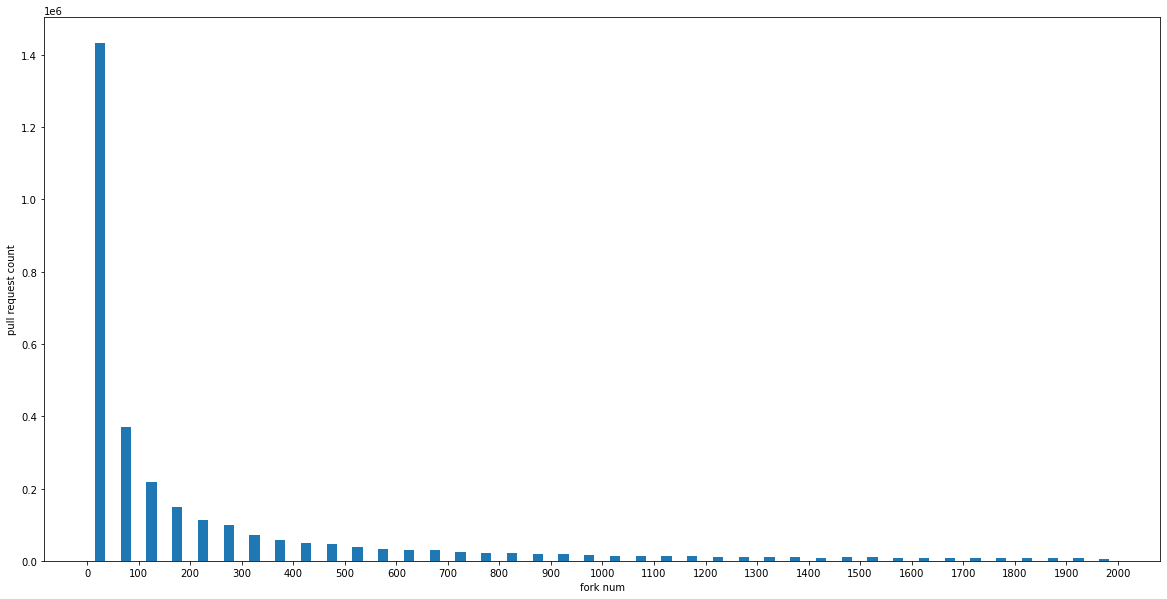

In [57]:
fork_num_low_2000 =popu_of_pro[popu_of_pro['fork_num']<2000]['fork_num'].values.tolist()
picturehist(fork_num_low_2000,0,2100,100,40,0.4,'fork num','pull request count','fork count less 2000')

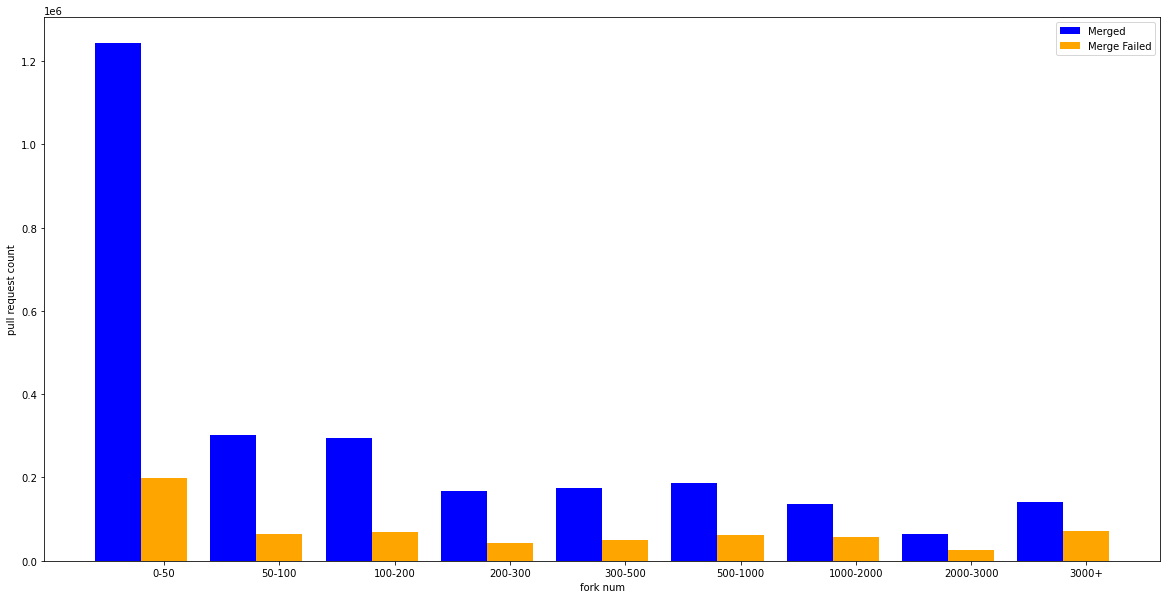

In [58]:
fork_Merged = fork_num_merge_or_not.iloc[0][0:9].values.tolist()
fork_Merge_Failed = fork_num_merge_or_not.iloc[1][0:9].values.tolist()
fork_name = [
    '0-50', '50-100', '100-200', '200-300', '300-500', '500-1000', '1000-2000',
    '2000-3000', '3000+'
]
picture_double_bar(fork_Merged,
                   fork_Merge_Failed,
                   fork_name,
                   xlabel='fork num',
                   ylabel='pull request count')

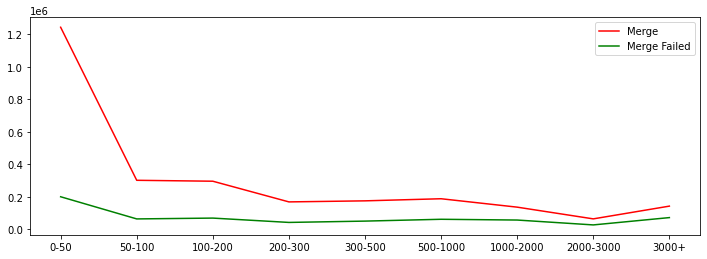

In [59]:
picture_double_plot(fork_Merged,fork_Merge_Failed,fork_name)

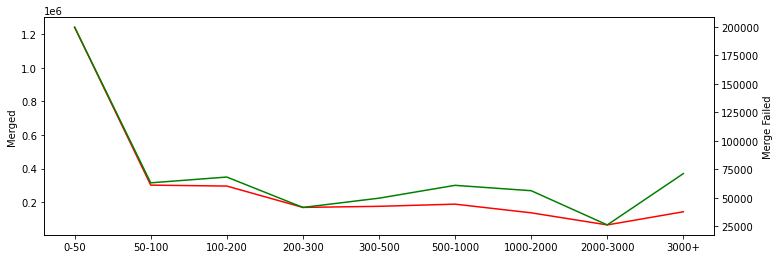

In [60]:
picture_sameX_plot(fork_Merged,fork_Merge_Failed,fork_name)

# Characteristics3:Age of project

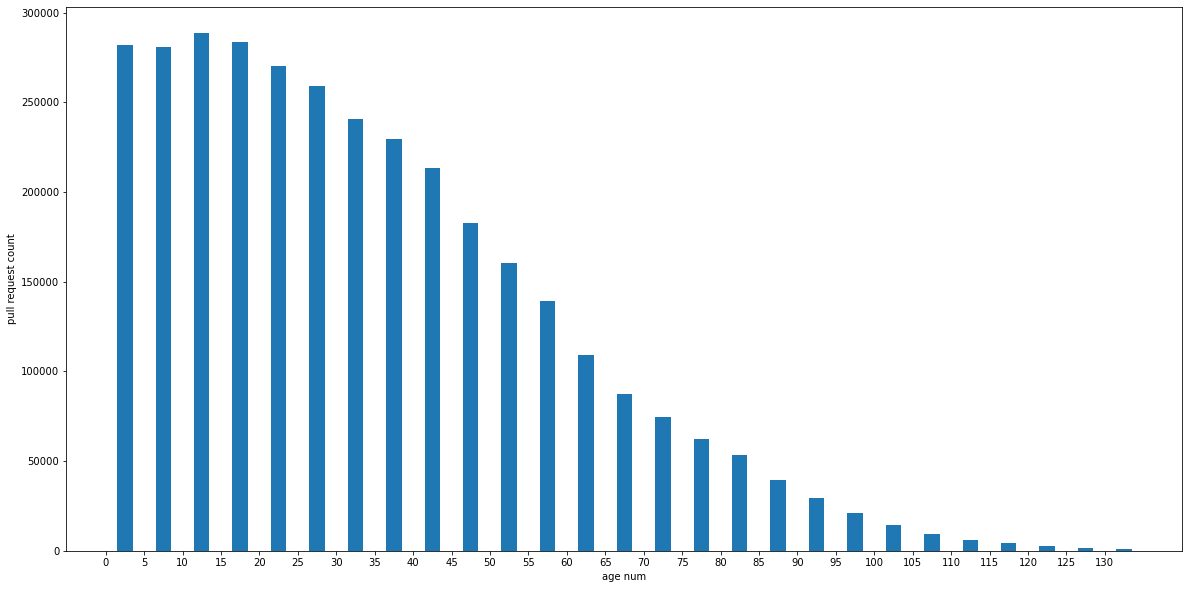

In [61]:
age_num = age['project_age'].values.tolist()
bin=int((max(age_num)-min(age_num))/5)
picturehist(age_num,min(age_num),max(age_num),5,bin,0.4,'age num','pull request count','age of project')

In [62]:
age_Merged=age_num_merge_or_not.iloc[0][0:14].values.tolist()
age_Merge_Failed=age_num_merge_or_not.iloc[1][0:14].values.tolist()
age_name = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120','120-130','130+']

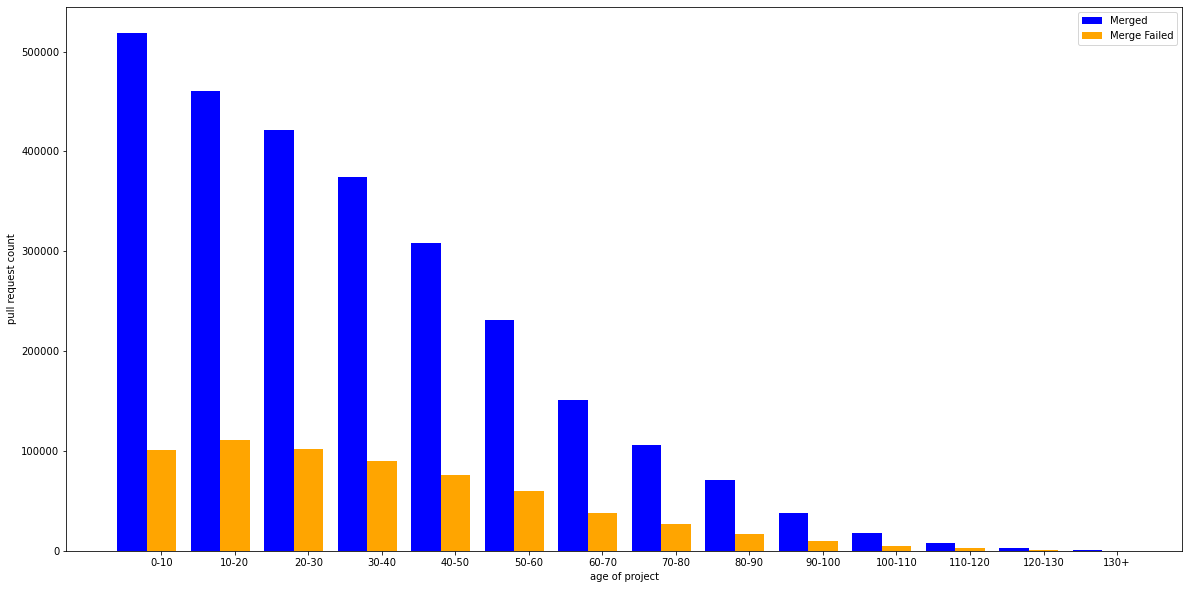

In [63]:
picture_double_bar(age_Merged,age_Merge_Failed,age_name,xlabel='age of project',ylabel='pull request count')

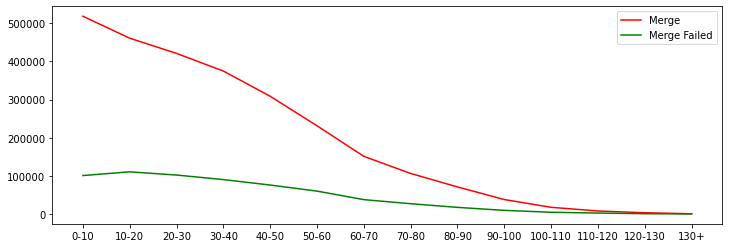

In [64]:
picture_double_plot(age_Merged,age_Merge_Failed,age_name)

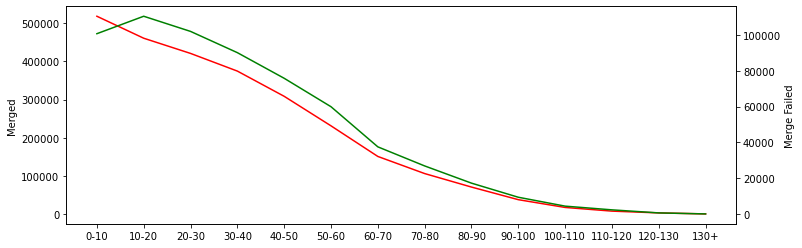

In [65]:
picture_sameX_plot(age_Merged,age_Merge_Failed,age_name)

# Characteristics4:Workload of a project

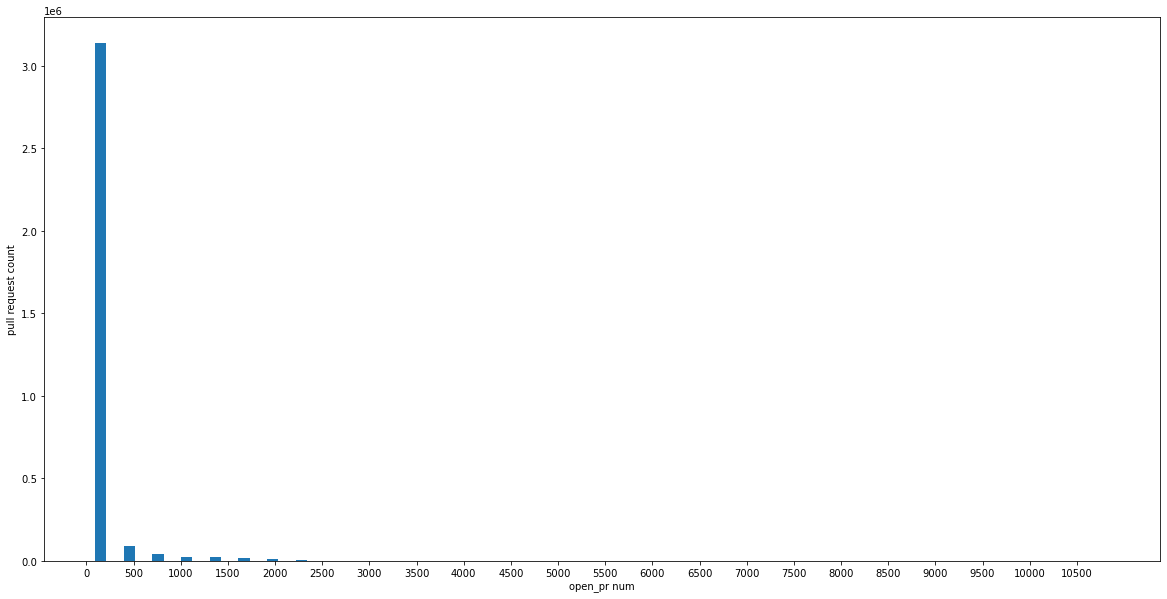

In [66]:
workload_num = workload_of_project['open_pr_num'].values.tolist()
bin=int((max(workload_num)-min(workload_num))/300)
picturehist(workload_num,min(workload_num),max(workload_num),500,bin,0.4,'open_pr num','pull request count','workload count')

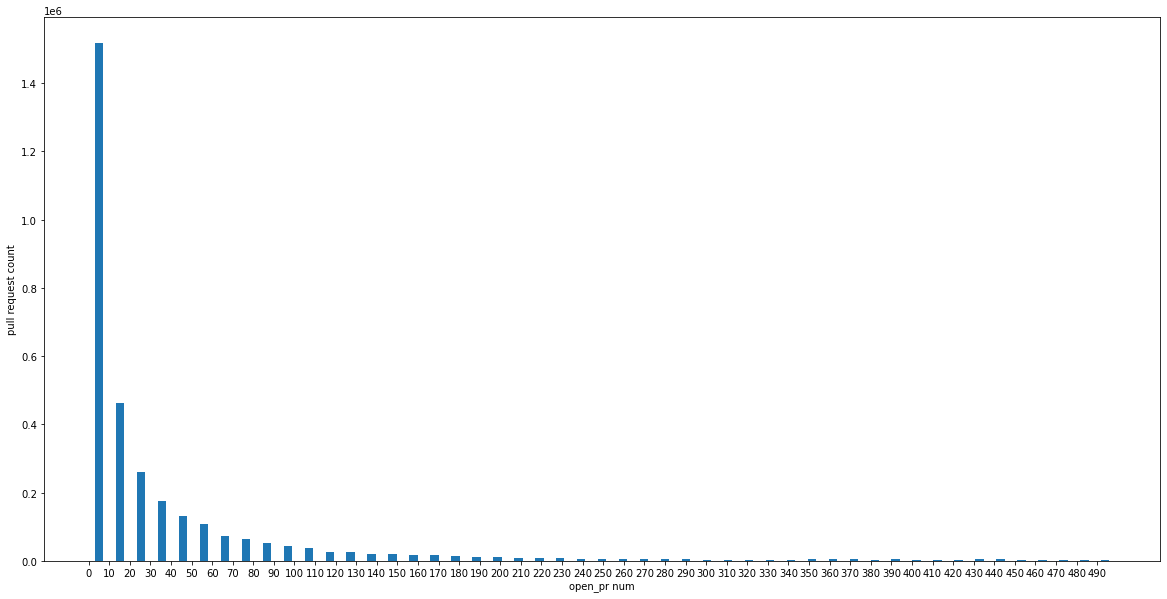

In [67]:
workload_num_low_500 =workload_of_project[workload_of_project['open_pr_num']<500]['open_pr_num'].values.tolist()
bin=int((max(workload_num_low_500)-min(workload_num_low_500))/10)
picturehist(workload_num_low_500,min(workload_num_low_500),max(workload_num_low_500),10,bin,0.4,'open_pr num','pull request count','workload count less_500')

In [93]:
workload_10=workload_of_project[workload_of_project['open_pr_num']<=10].values.tolist()
workload_20=workload_of_project[(workload_of_project['open_pr_num']>10)&(workload_of_project['open_pr_num']<=20)].values.tolist()
workload_30=workload_of_project[(workload_of_project['open_pr_num']>20)&(workload_of_project['open_pr_num']<=30)].values.tolist()
workload_40=workload_of_project[(workload_of_project['open_pr_num']>30)&(workload_of_project['open_pr_num']<=40)].values.tolist()
workload_50=workload_of_project[(workload_of_project['open_pr_num']>40)&(workload_of_project['open_pr_num']<=50)].values.tolist()
workload_100=workload_of_project[(workload_of_project['open_pr_num']>50)&(workload_of_project['open_pr_num']<=100)].values.tolist()
workload_200=workload_of_project[(workload_of_project['open_pr_num']>100)&(workload_of_project['open_pr_num']<=200)].values.tolist()
workload_300=workload_of_project[(workload_of_project['open_pr_num']>200)&(workload_of_project['open_pr_num']<=300)].values.tolist()
workload_400=workload_of_project[(workload_of_project['open_pr_num']>300)&(workload_of_project['open_pr_num']<=400)].values.tolist()
workload_500=workload_of_project[(workload_of_project['open_pr_num']>400)&(workload_of_project['open_pr_num']<=500)].values.tolist()
workload_1000=workload_of_project[(workload_of_project['open_pr_num']>500)&(workload_of_project['open_pr_num']<=1000)].values.tolist()
workload_1500=workload_of_project[(workload_of_project['open_pr_num']>1000)&(workload_of_project['open_pr_num']<=1500)].values.tolist()
workload_2000=workload_of_project[(workload_of_project['open_pr_num']>1500)&(workload_of_project['open_pr_num']<=2000)].values.tolist()
workload_more_2000=workload_of_project[workload_of_project['open_pr_num']>2000].values.tolist()

In [96]:

workload_list_10=count(workload_10)
workload_list_20=count(workload_20)
workload_list_30=count(workload_30)
workload_list_40=count(workload_40)
workload_list_50=count(workload_50)
workload_list_100=count(workload_100)
workload_list_200=count(workload_200)
workload_list_300=count(workload_300)
workload_list_400=count(workload_400)
workload_list_500=count(workload_500)
workload_list_1000=count(workload_1000)
workload_list_1500=count(workload_1500)
workload_list_2000=count(workload_2000)
workload_list_more_2000=count(workload_more_2000)
workload_num_merge_or_not = pd.DataFrame({
                        '0-10': workload_list_10,
                        '10-20': workload_list_20,
                        '20-30': workload_list_30,
                        '30-40': workload_list_40,
                        '40-50': workload_list_50,
                        '50-100': workload_list_100,
                        '100-200':workload_list_200,
                        '200-300':workload_list_300,
                        '300-400':workload_list_400,
                        '400-500':workload_list_500,
                        '500-1000':workload_list_1000,
                        '1000-1500':workload_list_1500,
                        '1500-2000':workload_list_1500,
                        '>2000':workload_list_more_2000
                         })

workload_num_merge_or_not['ALL'] = workload_num_merge_or_not.apply(lambda x: x.sum(), axis=1)
workload_num_merge_or_not.loc['ALL'] = workload_num_merge_or_not.apply(lambda x: x.sum())
workload_num_merge_or_not.index = ['1', '0', 'ALL']
workload_num_merge_or_not.loc['merge failed percent'] = workload_num_merge_or_not.loc['0'].values/workload_num_merge_or_not.loc['ALL'].values
workload_num_merge_or_not.loc['merged percent'] = workload_num_merge_or_not.loc['1'].values/workload_num_merge_or_not.loc['ALL'].values
workload_num_merge_or_not

,0-10,10-20,20-30,30-40,40-50,50-100,100-200,200-300,300-400,400-500,500-1000,1000-1500,1500-2000,>2000,ALL
1,1299715.000,377415.000,208825.000,137905.000,102738.000,260827.000,147907.000,43420.000,24418.000,17330.000,46089.000,21108.000,21108.000,7823.000,2716628.000
0,217358.000,84831.000,52296.000,37065.000,28756.000,75679.000,49449.000,13709.000,12274.000,12862.000,31021.000,13057.000,13057.000,2340.000,643754.000
ALL,1517073.000,462246.000,261121.000,174970.000,131494.000,336506.000,197356.000,57129.000,36692.000,30192.000,77110.000,34165.000,34165.000,10163.000,3360382.000
merge failed percent,0.143,0.184,0.200,0.212,0.219,0.225,0.251,0.240,0.335,0.426,0.402,0.382,0.382,0.230,0.192
merged percent,0.857,0.816,0.800,0.788,0.781,0.775,0.749,0.760,0.665,0.574,0.598,0.618,0.618,0.770,0.808


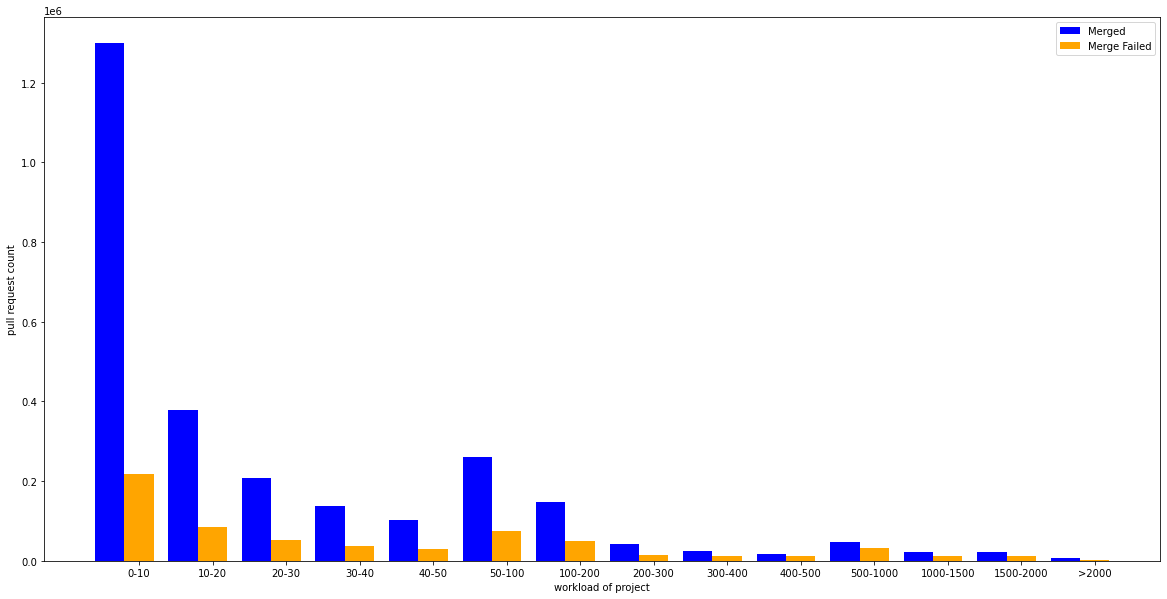

In [97]:
workload_Merged=workload_num_merge_or_not.iloc[0][0:14].values.tolist()
workload_Merge_Failed=workload_num_merge_or_not.iloc[1][0:14].values.tolist()
workload_name = ['0-10','10-20','20-30','30-40','40-50','50-100','100-200','200-300','300-400','400-500','500-1000','1000-1500','1500-2000','>2000']
picture_double_bar(workload_Merged,workload_Merge_Failed,workload_name,xlabel='workload of project',ylabel='pull request count')

# Characteristics5：Activeness of project and Characteristics6：Openness of a project

## Logistic regression and cross validation processing

In [73]:
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

Standardized processing and division of test set training set

In [74]:
std_scale = preprocessing.StandardScaler().fit(feature[['pushed_delta','pr_succ_rate','open_issue_num','fork_num']])
X = std_scale.transform(feature[['pushed_delta','pr_succ_rate','open_issue_num','fork_num']])
Y= np.array(feature['merged_or_not'])
cv = StratifiedKFold(n_splits=5,shuffle=False)

In [75]:
lr_l1=linear_model.LogisticRegression(penalty='l1',solver='liblinear',multi_class ='ovr')
lr_l2=linear_model.LogisticRegression(penalty='l2',solver='liblinear',multi_class ='ovr')

In [76]:
def muti_score(model,trainX,trainY):
        accuracy = cross_val_score(model, trainX, trainY, scoring='accuracy', cv=cv)
        f1_score = cross_val_score(model, trainX, trainY, scoring='f1', cv=cv)
        auc = cross_val_score(model, trainX, trainY,scoring='roc_auc', cv=cv)
        print("accuracy mean:",accuracy.mean())
        print("accuracy std dev:",accuracy.std())
        print("F1_score mean:",f1_score.mean())
        print("F1_score std dev:",f1_score.std())
        print("AUC:",auc.mean())

In [77]:
muti_score(lr_l1,X,Y)

accuracy mean: 0.8082950784971752
accuracy std dev: 0.0001748284227042416
F1_score mean: 0.8935355805939285
F1_score std dev: 0.0001016014815654802
AUC: 0.6079806093159952


In [79]:
muti_score(lr_l2,X,Y)

accuracy mean: 0.8082956758803382
accuracy std dev: 0.0001747208329979328
F1_score mean: 0.8935359898788435
F1_score std dev: 0.00010163227686467845
AUC: 0.607977783896116


In [80]:
feature

,pushed_delta,pr_succ_rate,open_issue_num,fork_num,merged_or_not
0,196583.000,0.978,52,140,1
1,9.000,1.000,1,1,0
2,5743.000,0.996,0,11,1
3,978.000,0.987,212,269,1
4,517153.000,0.978,93,64,1
...,...,...,...,...,...
3347932,18087.000,1.000,2,0,1
3347933,431.000,0.965,3359,2454,0
3347934,78766.000,0.992,62,125,1
3347935,995650.000,0.992,174,84,0


Feature Refinement

In [81]:
new_feature = feature
new_feature['fork_num']=new_feature['fork_num'].apply(lambda x:np.log(x+1))

<ipython-input-81-981d56480aca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feature['fork_num']=new_feature['fork_num'].apply(lambda x:np.log(x+1))


In [82]:
new_feature

,pushed_delta,pr_succ_rate,open_issue_num,fork_num,merged_or_not
0,196583.000,0.978,52,4.949,1
1,9.000,1.000,1,0.693,0
2,5743.000,0.996,0,2.485,1
3,978.000,0.987,212,5.598,1
4,517153.000,0.978,93,4.174,1
...,...,...,...,...,...
3347932,18087.000,1.000,2,0.000,1
3347933,431.000,0.965,3359,7.806,0
3347934,78766.000,0.992,62,4.836,1
3347935,995650.000,0.992,174,4.443,0


In [83]:
new_std_scale = preprocessing.StandardScaler().fit(new_feature[['pushed_delta','pr_succ_rate','open_issue_num','fork_num']])
new_X = new_std_scale.transform(new_feature[['pushed_delta','pr_succ_rate','open_issue_num','fork_num']])
new_Y= np.array(new_feature['merged_or_not'])

In [84]:
muti_score(lr_l1,new_X,new_Y)

accuracy mean: 0.8098894931753087
accuracy std dev: 8.156087274010962e-05
F1_score mean: 0.8947608076050114
F1_score std dev: 4.7329293923862077e-05
AUC: 0.6244924451105522


In [86]:
muti_score(lr_l2,new_X,new_Y)

accuracy mean: 0.8098894931753087
accuracy std dev: 8.156087274010962e-05
F1_score mean: 0.8947608076050114
F1_score std dev: 4.7329293923862077e-05
AUC: 0.6244924510691384


In [87]:
lr_l1.fit(X,Y)
print(lr_l1.coef_)

[[-0.00424368  0.23072823  0.08265489 -0.2360897 ]]


In [88]:
lr_l2.fit(X,Y)
print(lr_l2.coef_)

[[-0.00423981  0.23073092  0.08271627 -0.23612521]]


In [89]:
lr_l1.fit(new_X,new_Y)
lr_l1.coef_

array([[-0.03037031,  0.1989807 ,  0.10567307, -0.41670562]])

In [90]:
print(lr_l1.classes_)

[0 1]
